In [1]:
import time 
import numpy as np
import matplotlib.pyplot as plt
from data_util_KNN import readMnist#Mnist数据集
from data_util_KNN import load_CIFAR10#Cifar10 数据集
from KNN import KNN#导入KNN模型

##1.Mnist

In [2]:
X_train, y_train, X_test, y_test = readMnist('.\datasets\mnist')#Mnist路径

In [3]:
mask = range(5000)#选取训练集，X_train数量太大，这里选取5000张训练
X_tr = X_train[mask]
y_tr = y_train[mask]
mask = range(5000, 5500)#选取测试集,这里选取500张测试
X_te = X_test[mask]
y_te = y_test[mask]
print('训练：', X_tr.shape, y_tr.shape)
print('测试：', X_te.shape, y_te.shape)

训练： (5000, 784) (5000,)
测试： (500, 784) (500,)


##训练及测试

In [4]:
knn = KNN()
knn.train(X_tr, y_tr)#训练 X: (N * W ) 维 y: (N, ) 维

In [5]:
N = 50#从测试集里选取 N 张图片测试，方便可视化
K = 3#K值
num_test = range(N)

In [6]:
label, images, dists= knn.test(X_te[num_test], K)#测试，num_test是测试图片数量
print(N, '个预测标签：', label.shape)
print(N, '*', K, '个图像：', images.shape)
print(N, '*', K, '个距离：', dists.shape)
print('Test accurary: ', (y_te[num_test] == label).mean())#50张图片的准确率

50 个预测标签： (50,)
50 * 3 个图像： (50, 2352)
50 * 3 个距离： (50, 3)
Test accurary:  0.98


##显示函数

   Too many pictures to show, so we select 10 random pictures to show


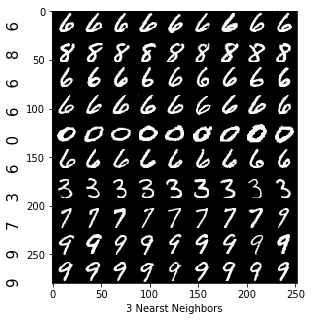

In [7]:
'''
显示函数: 
如果测试图片数量大于10，随机选取10张图片显示，
图像共 9 列，图像最左边的数字是 预测 的标签，
第 0 列是 原始 的图像
第 1 到 8 列是该图在训练集合中8幅曼哈顿距离最近的图像
图像下方标注是 K 值
'''
knn.show()

##K值曲线

In [8]:
#5000 张训练图，500 张测试图下 取不同 K 值的结果, 运行时间：1 min
#np.unique(y_train, return_counts=True)
k_list = [1, 3, 5, 7, 9]
k_value = []#存储K值对应的准确率
start = time.time()#开始时间
for k in list(k_list):
    knn = KNN()
    knn.train(X_tr, y_tr)
    t, i, d= knn.test(X_te, k)
    k_mean = (t == y_te).mean()
    k_value.append(k_mean)
end = time.time()#结束时间
print('K: \t',' \t'.join(str(i) for i in k_list))#K值
print('Acc: \t',' \t'.join(str(i) for i in k_value))#该K值下对应的在测试集上的准确率
print('时间：{:.2f} s'.format(end - start))

K: 	 1 	3 	5 	7 	9
Acc: 	 0.96 	0.964 	0.97 	0.972 	0.974
时间：55.89 s


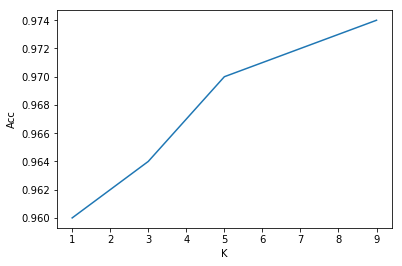

In [9]:
plt.plot(k_list, k_value)
plt.xlabel('K')
plt.ylabel('Acc')
plt.show()

##2.cifar-10

In [10]:
X_train, y_train, X_test, y_test = load_CIFAR10('.//datasets//cifar-10-batches-py')#Cifar10数据路径

In [11]:
mask = range(5000)
X_tr = X_train[mask].reshape(5000, -1)
y_tr = y_train[mask]
mask = range(5000, 5500)
X_te = X_test[mask].reshape(500, -1)
y_te = y_test[mask]

In [12]:
N = 50#从测试集里选取 N 张图片测试，方便可视化
K = 5#K值
num_test = range(N)

##训练及测试

In [13]:
knn = KNN()
knn.train(X_tr, y_tr)#训练 X: (N * W ) 维 y: (N, ) 维

In [14]:
label, images, dists= knn.test(X_te[num_test], K)
print(N, '个预测标签：', label.shape)
print(N, '*', K, '个图像：', images.shape)
print(N, '*', K, '个距离：', dists.shape)
print('Test accurary: ', (y_te[num_test] == label).mean())

50 个预测标签： (50,)
50 * 5 个图像： (50, 15360)
50 * 5 个距离： (50, 5)
Test accurary:  0.32


##显示函数

   Too many pictures to show, so we select 10 random pictures to show


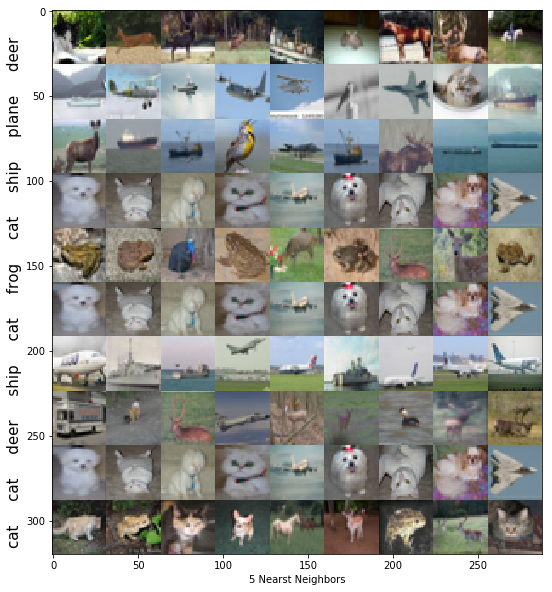

In [15]:
'''
显示函数: 
如果测试图片数量大于10，随机选取10张图片显示，
图像共 9 列，图像最左边的单词是 预测 的标签，
第 0 列是 原始 的图像
第 1 到 8 列是该图在训练集合中 8 幅曼哈顿距离最近的图像
图像下方标注是 K 值
'''
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
aa = knn.showRGB()

##K值曲线

In [16]:
#5000 张训练图，500 张测试图下 取不同 K 值的结果， 测试时间较久: 6 min
#np.unique(y_train, return_counts=True)
k_list = [1, 3, 5, 7, 9]
k_value = []
num_test = range(500)#用于控制程序运行时间， 最大为500，即测试集 X_tr 的数量
start = time.time()#开始时间
for k in list(k_list):
    knn = KNN()
    knn.train(X_tr, y_tr)
    t, i, d= knn.test(X_te[num_test], k)
    k_mean = (t == y_te[num_test]).mean()
    k_value.append(k_mean)
end = time.time()#结束时间
print('K: \t',' \t'.join(str(i) for i in k_list))#K值
print('Acc: \t',' \t'.join(str(i) for i in k_value))#该K值下对应的在测试集上的准确率
print('时间：{:.2f} s'.format(end - start))

K: 	 1 	3 	5 	7 	9
Acc: 	 0.294 	0.284 	0.282 	0.29 	0.294
时间：436.11 s


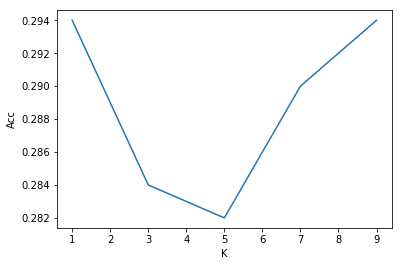

In [17]:
plt.plot(k_list, k_value)
plt.xlabel('K')
plt.ylabel('Acc')
plt.show()